#  CONTEÚDO

## 1 - Objetivos da análise

## 2 - Entendimento dos dados

## 3 - Preparação e análise exploratória dos dados

## 4 - Método holdout

## 5 - Implementação do KNN  (k-Nearest Neighbors)

## 6 - Modelagem e avaliação

## 7 - Normalização e avaliação

## 8 -  Considerações finais

## 9 - Instruções para execução

## 1 - Objetivos da análise


<ul>
    <li>Fazer uma implementação própria do algoritmo KNN para classificação</li>
    <li>Avaliar o uso do algoritmo KNN com diferentes valores de k, através do
método holdout</li>
    <li>Implementar uma função para fazer a divisão dos dados em treino e teste, de
acordo com o método holdout. </li>
    <li>Implementar normalização de dados e verificar o seu efeito sobre os
resultados da classificação</li>
</ul> 


Mais informação no <a href="https://github.com/mediote/knn/blob/main/instrucoes.pdf">arquivo</a> .

## 2 - Entendimento dos dados

Os dados se referem à classificação de tumores de mama em maligno (1) ou benigno (0), de acordo com a coluna target. Os atributos (29 ao total) descrevem características dos núcleos celulares presentes em uma imagem digitalizada do material coletado na biópsia pelo método fine needle aspirate (FNA). Estes dados foram obtidos do  <a href="https://biodatamining.biomedcentral.com/articles/10.1186/s13040-017-0154-4
">repositório</a> PLMB.

## 3 - Preparação e análise exploratória dos dados

In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# Para execução no Colab descomente o trecho de código abaixo:

#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#downloaded = drive.CreateFile({'id':"1n588s8WphRQQu1iusfxaAXN1W5d6kDH3"}) 
#downloaded.GetContentFile('breast_cancer_data.csv') 

In [3]:
cancer_data = pd.read_csv('./breast_cancer_data.csv')

### Verificando  proporção dos dados

In [4]:
cancer_data['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

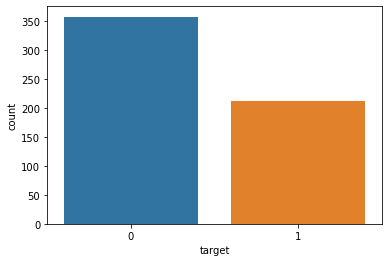

In [5]:
sns.countplot(x=cancer_data['target'], label = 'count')

### Resultado

Os dados encontram-se desbalanceados, com 357 ocorrências para câncer benigno e 212 para maligno.

### Balançeando os dados

In [6]:
cancer_data_0 = cancer_data[cancer_data.target==0]
cancer_data_0 = cancer_data_0.sample(n=212)
cancer_data_1 = cancer_data[cancer_data.target==1]
cancer_data = pd.concat([cancer_data_0, cancer_data_1])
cancer_data['target'].value_counts()

0    212
1    212
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

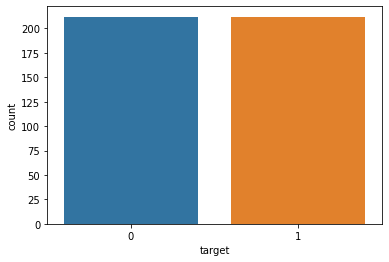

In [7]:
sns.countplot(x=cancer_data['target'], label = 'count')

### Resultado

A base foi balanceada de forma a distribuir 212 ocorrências para câncer benigno e maligno.

### Característica dos atributos

In [8]:
cancer_data = cancer_data.reset_index().drop(columns=["index","Unnamed: 0"])

In [9]:
cancer_data.describe()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,target
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,14.821566,19.677123,96.834245,721.888915,0.097424,0.112945,0.103619,0.057099,0.183908,0.062780,...,26.316627,114.368019,992.418160,0.134528,0.280054,0.309407,0.129004,0.296925,0.085673,0.500000
std,3.704771,4.353274,25.552803,377.629290,0.014261,0.055546,0.083350,0.041018,0.027845,0.007212,...,6.197434,35.422756,614.269001,0.023154,0.166886,0.212289,0.067518,0.065490,0.019022,0.500591
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.023440,0.000000,0.000000,0.116700,0.049960,...,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,12.180000,16.535000,77.990000,454.750000,0.087277,0.071043,0.036950,0.023407,0.163775,0.057530,...,21.835000,87.205000,547.400000,0.119275,0.163525,0.144975,0.075188,0.255050,0.072830,0.000000
50%,14.025000,19.360000,91.300000,602.900000,0.097330,0.104400,0.085335,0.051855,0.181350,0.061545,...,25.810000,105.950000,786.300000,0.133250,0.239650,0.280250,0.121950,0.286700,0.081340,0.500000
75%,17.367500,22.115000,114.250000,936.775000,0.106300,0.143650,0.152350,0.086260,0.197150,0.066433,...,30.707500,137.950000,1302.500000,0.149100,0.372425,0.426075,0.182000,0.322775,0.094653,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,1.000000


### Resultado

Os atributos encontram-se fora de escala, com a distribuição variando muito nos valores máximo e mínimo e medio. Essa variação impacta negativamente no cálculo de disância, pois atributos com ordem de grandeza maiores impactam mais nos resultados do que atributos com ordem de grandeza menores.

## 4 - Método holdout

### Divisão dos dados em treino e teste

Foi usada a proporção de 80% para treino e 20% para teste, escolhidas de maneira aleatótia.

In [10]:
from sklearn.model_selection import train_test_split

X = cancer_data.iloc[:,:30].sort_index().reset_index().drop(columns=["index"])
y = cancer_data.iloc[:,[30]].sort_index().reset_index().drop(columns=["index"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

## 5 - Implementação do KNN


A entrada do algorítimo é o valor de K, e a saída são os dados de teste classificados. Foi usada como medida de distância a euclidiana.

In [11]:
def knn(k):
    predicted = list()
    for _ , test in X_test.iterrows(): # Para cada linha no conjunto de teste faça:
        distances = pd.DataFrame(X_train.apply(lambda train: (np.linalg.norm(train - test) ),axis=1),columns=['distances'])
        instances = distances.sort_values('distances')
        k_instances = instances[:k]
        k_instances = k_instances.join(y_train)
        votes = k_instances['target'].value_counts() 
        
        if (0 in votes.index and 1 in votes.index):            
            if(votes[0] > votes[1]):                
                predicted.append(0)
            elif (votes[0] < votes[1]):                
                predicted.append(1)
        elif 0 not in votes.index:           
            predicted.append(1)
        elif 1 not in votes.index:            
            predicted.append(0)

    result = X_test.join(y_test)
    result = result.assign(predicted=predicted)
    return result

## 6 -  Modelagem e avaliação

### Avaliar resultados para diferentes valores de K 

O algorítimo executa a função KNN para todos os valores em k-values, retornando a acurácia e o tempo total de execução em cada passo da iteração.

In [12]:
k_values = [1, 3, 5, 7]
for k in k_values:
    begin = time.time()
    classify = knn(k=k)
    end = time.time()
    total_time = end - begin
    acucracy = accuracy_score(classify['target'], classify['predicted'])
    print('| K =',k ,':', acucracy,'| Total time :', total_time, '|')

| K = 1 : 0.9058823529411765 | Total time : 3.617668390274048 |
| K = 3 : 0.9294117647058824 | Total time : 3.6672239303588867 |
| K = 5 : 0.9411764705882353 | Total time : 3.690131902694702 |
| K = 7 : 0.9411764705882353 | Total time : 3.7978484630584717 |


### Resultados

Ao observar a saída da linha 11, a acurácia do modelo varia conforme o valor K aumenta. O tempo total de execução do algorítimo praticamente não muda no decorrer da iteração.

## 7 - Normalização e avaliação

### Função min-max para normalização dos dados

In [13]:
X_train = X_train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))) 
X_test = X_test.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))) 

### Avaliar os resultados para diferentes valores de K

In [14]:
k_values = [1, 3, 5, 7]
for k in k_values:
    begin = time.time()
    classify = knn(k=k)
    end = time.time()
    total_time = end - begin
    acucracy = accuracy_score(classify['target'], classify['predicted'])
    print('| K =',k ,':', acucracy,'| Total time :', total_time, '|')

| K = 1 : 0.9647058823529412 | Total time : 3.7629382610321045 |
| K = 3 : 0.9529411764705882 | Total time : 3.6761677265167236 |
| K = 5 : 0.9529411764705882 | Total time : 3.930488109588623 |
| K = 7 : 0.9411764705882353 | Total time : 3.802830696105957 |


### Resultados

A normalização impactou de forma positiva, com uma melhora razoável nos resultados para todos os valores de K, conforme observado na saída da linha 14.

## 8 -  Considerações finais

Nesta análise, foi feita uma implementação própria do algoritimo KNN para classificar dados de tumores de mama em maligno (1) ou benigno (0), de acordo com a coluna target. Os dados foram balanceados, e, divididos em amostras de treino e teste na proporção 80/20, observando o método holdout. Inicialmente, os dados não normalizados, foram classificados com os valores de k=1, 2, 5, 7, apresentando resultados de acurácia e tempo de execução conforme a tablea abaixo:

<table>
  <tr>
    <th style="text-align: left">Acurácia</th>
    <th style="text-align: left">Tempo Execução</th> 
  </tr>
  <tr>
    <td>K = 1 : 0.9058823529411765</td>
    <td style="text-align: left">3.617668390274048</td>
  </tr>
  <tr>
    <td>K = 3 : 0.9294117647058824</td>
    <td style="text-align: left">3.6672239303588867</td>
  </tr>
  <tr>
    <td>K = 5 : 0.9411764705882353</td>
    <td style="text-align: left">3.690131902694702</td>
  </tr>
   <tr>
    <td>K = 7 : 0.9411764705882353</td>
    <td style="text-align: left">3.7978484630584717</td>
  </tr>
</table>

Em um segundo momento, os dados de treino e teste foram normalizados e o processo de classificação foi repetido observando os mesmos crtérios nos valores de k descritos acima.

<table>
  <tr>
    <th style="text-align: left">Acurácia</th>
    <th style="text-align: left">Tempo Execução</th> 
  </tr>
  <tr>
    <td>K = 1 : 0.9647058823529412</td>
    <td style="text-align: left">3.7629382610321045</td>
  </tr>
  <tr>
    <td>K = 3 : 0.9529411764705882</td>
    <td style="text-align: left">3.6761677265167236</td>
  </tr>
  <tr>
    <td>K = 5 : 0.9529411764705882</td>
    <td style="text-align: left">3.930488109588623</td>
  </tr>
   <tr>
    <td>K = 7 : 0.9411764705882353</td>
    <td style="text-align: left">3.802830696105957</td>
  </tr>
</table>

Conclui-se que, o tempo de execução total do algorítimo varia pouco com a mudança dos valores de k, e que, após a normalização dos dados, a acurácia do obtida melhorou razoavelmente.

## 9 - Instruções para execução

<ul>
    <li>Github : https://github.com/mediote/knn</li>
    <li>Colab  : https://colab.research.google.com/drive/1CLJ45koDzznmEnDcf_TAkKHCRajc3LRH#scrollTo=51d0805d</li>
</ul>    


Para executar o arquivo localmente com Jupyter Notebook, ou ambinte de sua preferência, basta clonar o <a href="https://github.com/mediote/knn.git">repositório</a> e comentar as linhas na  <a href="https://colab.research.google.com/drive/1CLJ45koDzznmEnDcf_TAkKHCRajc3LRH#scrollTo=c05dfc81&line=4&uniqifier=1">célula</a> 11. A base de dados encontra-se no mesmo diretório do projeto.

Para executar pelo <a href="https://colab.research.google.com/drive/1CLJ45koDzznmEnDcf_TAkKHCRajc3LRH#scrollTo=51d0805d">Colab</a>, basta descomentar as linhas na  <a href="https://colab.research.google.com/drive/1CLJ45koDzznmEnDcf_TAkKHCRajc3LRH#scrollTo=c05dfc81&line=4&uniqifier=1">célula</a> 11, acessar o menu "Ambiente de execução", opção "Executar tudo".